# Interactive Machine Learning Demo - Logistic Regression

In [1]:
from ipywidgets import interact, interactive, IntSlider, Layout
import ipywidgets as widgets
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

import pandas as pd

## Logistic Regression and Classficiation

In [2]:
from sklearn.linear_model import logistic
from sklearn.model_selection import train_test_split

### Function definition generating data points with noise and classifying

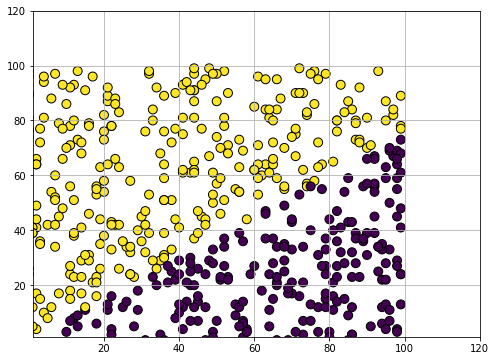

In [16]:
    x= np.linspace(0,100,100*5)
    x1= np.random.choice(100,size=500)
    x2= np.random.choice(100,size=500)
    y=1.5*x1-2*x2
    yn= y+5*np.random.normal(loc=1,scale=1,size=500)
    
    plt.figure(figsize=(8,5))
    c = [i < 0 for i in y]
    f, ax = plt.subplots(figsize=(8, 6))
    #ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    ax.set_xlim(left=1*1.2,right=100*1.2)
    ax.set_ylim(bottom=1*1.2,top=100*1.2)
    ax.scatter(x1,x2,c=c,edgecolors='k',s=80)
    plt.grid(True)
    plt.show()
    a= (np.array(x),np.array(y),np.array(yn),np.array(x1),np.array(x2))


In [3]:
def func_log(N_samples,x_min,x_max,noise_magnitude,noise_sd,noise_mean):
    x= np.linspace(x_min,x_max,N_samples*5)
    x1= np.random.choice(x,size=N_samples)
    x2= np.random.choice(x,size=N_samples)
    y=1.5*x1-2*x2
    yn= y+noise_magnitude*np.random.normal(loc=noise_mean,scale=noise_sd,size=N_samples)
    
    plt.figure(figsize=(8,5))
    c = [i < 0 for i in y]
    f, ax = plt.subplots(figsize=(8, 6))
    #ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    ax.set_xlim(left=x_min*1.2,right=x_max*1.2)
    ax.set_ylim(bottom=x_min*1.2,top=x_max*1.2)
    ax.scatter(x1,x2,c=c,edgecolors='k',s=80)
    plt.grid(True)
    plt.show()
    
    return (np.array(x),np.array(y),np.array(yn),np.array(x1),np.array(x2))

### Plot and interactively control the data points by calling ipywidget object

In [8]:
pl=interactive(func_log,N_samples={'Low (50 samples)':50,'High (200 samples)':200},x_min=(-5,0,1), x_max=(0,5,1),
              noise_magnitude=(0,5,1),noise_sd=(0.1,1,0.1),noise_mean=(-2,2,0.5))
display(pl)

### Store the generated data

In [5]:
xl,yl,ynl,x1l,x2l = pl.result
dic = {'X1':x1l,'X2':x2l,'out':ynl}
df = pd.DataFrame(data=dic)

def boolean (x):
    return int(x>0)
df['y']=df['out'].apply(boolean)
df.head()

,X1,X2,out,y
0,-1.132530,1.236948,-4.158082,0
1,-0.791165,1.779116,-3.965472,0
2,0.353414,-2.176707,4.414639,1
3,0.835341,1.236948,-1.029881,0
4,0.554217,1.477912,-1.960388,0


### Logistic regression encapsulated within a function

In [6]:
def log_fit(C,test_size,penalty):
    
    X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2']],df['y'],test_size=test_size,random_state=101)
    
    df_test=pd.DataFrame(X_test,columns=['X1','X2'])
    df_test['y']=y_test
    
    df_train=pd.DataFrame(X_train,columns=['X1','X2'])
    df_train['y']=y_train
    
    if (penalty=='L1 norm'):
        logm = logistic.LogisticRegressionCV(Cs=[np.power(10,-C)],penalty='l1',solver='saga')
    if (penalty=='L2 norm'):
        logm = logistic.LogisticRegressionCV(Cs=[np.power(10,-C)],penalty='l2',solver='lbfgs')
    
    logm.fit(X_train,y_train)
    
    train_score = logm.score(X_train,y_train)
    test_score = logm.score(X_test,y_test)
    
    xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = logm.predict_proba(grid)[:, 1].reshape(xx.shape)
        
    c_test = [i for i in df_test['y']]
    c_train = [i for i in df_train['y']]
    
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
    contour = ax[0].contourf(xx, yy, probs, 25, cmap="RdBu",vmin=0, vmax=1)
    ax1_c = f.colorbar(contour)
    ax1_c.set_label("$Prob\ (y = 1)$",fontsize=15)
    ax1_c.set_ticks([0, .25, .5, .75, 1])
    ax[0].set_xlabel("$X_1$",fontsize=15)
    ax[0].set_ylabel("$X_2$",fontsize=15)
    ax[0].contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=0.6,lw=3)
    
    ax[0].scatter(df_test['X1'],df_test['X2'],c=c_test,edgecolors='k',s=100)
    ax[0].set_title("\nTest score: %.3f\n"%(test_score),fontsize=20)
    
    contour = ax[1].contourf(xx, yy, probs, 25, cmap="RdBu",vmin=0, vmax=1)
    #ax2_c = f.colorbar(contour)
    #ax2_c.set_label("$Prob\ (y = 1)$",fontsize=15)
    #ax2_c.set_ticks([0, .25, .5, .75, 1])
    ax[1].set_xlabel("$X_1$",fontsize=15)
    ax[1].set_ylabel("$X_2$",fontsize=15)
    ax[1].contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=0.6,lw=3)
    
    ax[1].scatter(df_train['X1'],df_train['X2'],c=c_train,edgecolors='k',s=100)
    ax[1].set_title("\nTraining score: %.3f\n"%(train_score),fontsize=20)
        
    plt.grid(True)
    plt.tight_layout()
    plt.show()
      
    return (train_score,test_score)    

### Run the encapsulated ML function with ipywidget interactive

In [7]:
from ipywidgets import HBox, Label, FloatSlider

style = {'description_width': 'initial'}

lb1=Label (value="Play with options and watch the probability space evolve dynamically. \
Remember, smaller the value of $C$, stronger the regularization strength",fontsize=15)

logp=interactive(log_fit,C=FloatSlider(value=0,min=0,max=2,step=0.1,
                                       description='Regularization ($10^{-C}$), $C$', style=style,continuous_update=False),
                 test_size=FloatSlider(value=0.1,min=0.1,max=0.5,step=0.1,
                                       description = 'Test fraction ($X_{test}$)', style=style),
                penalty=widgets.RadioButtons(options=["L1 norm","L2 norm"], description = 'Penalty norm'))

# Set the height of the control.children[-1] so that the output does not jump and flicker
output = logp.children[-1]
output.layout.height = '500px'
output.layout.width = '1000px'

display(lb1)
display(logp)